In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# M1 Science et Ingénieurie des données
# Université de Rouen Normandie
# T. Paquet 2022 Thierry.Paquet@univ-rouen.fr

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

import numpy as np
import scipy as sp #right=True.
from operator import itemgetter, attrgetter

def TriVP(Valp,Vectp):
    # trie dans l'ordre décroisant les valeurs propres
    # en cas de valeurs propres complexes on trie  selon leu module
    liste1 = Vectp.tolist()
    liste2 = Valp.tolist()
    norme = np.abs(Valp)
    liste3 = norme.tolist()

    result = zip(liste1, liste2,liste3)
    result_trie =sorted(result,key =itemgetter(2), reverse=True)
    liste1, liste2, liste3 =  zip(*result_trie)
    Vectp = np.asarray(liste1)
    Valp = np.asarray(liste2)
    
    return Valp,Vectp

def Kernel(XC,kernel='linear',gamma=0,degre=3):
    # Calcule de la matrice de Gram, sélection du noyau
    # valeurs par défaut : 
    # rbf :gamma = 1/n
    # polynomial : degre = 3,    c=1
    n = XC.shape[1]
    m = XC.shape[0]
    if kernel == 'linear':
        K = XC @ XC.T
    elif kernel == 'rbf':
        # valeur par défaut comme dans scikitlearn
        if gamma == 0:
            gamma = 1/n
            
        K = np.ones((m,m))
        for i in range(m):
            for j in range(i+1,m):
                K[i,j] = np.exp(-np.linalg.norm(XC[i,:]-XC[j,:])**2 * gamma)
                K[j,i] = K[i,j]
    elif kernel =='poly':
        PS = XC @ XC.T + np.ones((m,m))
        K = np.power(PS,degre)
        
    return K

def myACP(X):
    n = X.shape[1]
    m = X.shape[0]
    moy = np.sum(X,0)/m # axe de la matrice selon lequel on somme
    np.reshape(moy,(n,1))
    # données centrées
    XC = X-moy.T
    
    # covariance
    S = XC.T@XC/m

    # calcule des vaclfleurs propres et vecteurs propres
    # vecteurs propres de norme 1 rangés en colonnes

    Valp, Vectp = np.linalg.eig(S)
    # il faut ordonner dans l'ordre des valeurs propres décroissantes
    Valp,Vectp = TriVP(Valp,Vectp)
    # on projette sur les deux premiers axes principaux
    Projection = XC @ Vectp[:,:2]
    
    return Valp

# def myKernelPCA(X,kernel='linear',gamma=0,degre=3):
#     n = X.shape[1]
#     m = X.shape[0]
#     moy = np.sum(X,0)/m # axe de la matrice selon lequel on somme
#     np.reshape(moy,(n,1))

#     # Etape 1: centrer les données
#     XC = 
    
#     # Etape 2: calcule de la matrice de Gram, sélection du noyau
#     K = Kernel(XC, kernel = kernel, gamma = gamma, degre = degre)

#     # Etape 3: centrage des produits scalaires
#     UN = np.ones((m,m))/m
#     Ktild = 
    
#     # Etape 4: calcule les vecteurs propres de Ktild 
#     Valp, Vectp = np.linalg.eig(Ktild) 

#     # Etape 5: il faut ordonner dans l'ordre des valeurs propres décroissantes
#     Valp,Vectp = TriVP(Valp,Vectp)
    
#     # Etape 6: Extraction des coordonnées des deux premiers vecteurs propres dans l'espac de départ
#     aj = 
    
#     # Etape 7: Normalisation de pour avoir des vecteurs propres de l'espace projeté soient normée
#     for i in range(2):
#         norm_aj = np.linalg.norm(aj[:,[i]])
#         aj[:,[i]] = aj[:,[i]] / np.sqrt( Valp[i].real) / norm_aj
    
#     # Etape 8: calcul des données projetées
#     Y = 
    
#     return Y.T

In [12]:
iris = datasets.load_iris()
y = iris.target

#######################################################################
#              ACP simple 
Y = myACP(iris.data) 
Y

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 4.

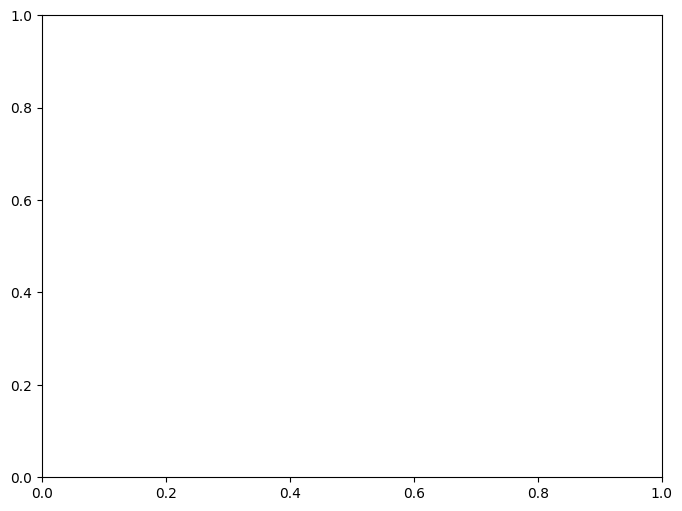

In [10]:
iris = datasets.load_iris()
y = iris.target

#######################################################################
#              ACP simple 
Y = myACP(iris.data)    
        
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('Les deux premières composantes principales du dataset IRIS')
plt.savefig('MyACP')
plt.show()
    
    # # on vérifie nos résultats de scikitlearn
    # acp = PCA(n_components = 4, copy=True, iterated_power='auto', \
    #           random_state=None, svd_solver='full', tol=0.0, whiten=False)
    
    # YY = acp.fit_transform(iris.data)

    # fig = plt.figure(1, figsize=(8, 6))
    # plt.clf()
    # plt.scatter(YY[:, 0], YY[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
    # plt.xlabel('1st PC')
    # plt.ylabel('2nd PC')
    # plt.title('scikit ACP des données IRIS')
    # plt.show()
    
#    #######################################################################
#    # mon ACP à noyaux
#    #                    'linear'   'rbf'   'poly'
#    Y = myKernelPCA(iris.data,kernel='rbf')
#    
#    fig = plt.figure(1, figsize=(8, 6))
#    plt.clf()
#    plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
#    plt.xlabel('1st KPC')
#    plt.ylabel('2nd KPC')
#    plt.title('my kernelPCA (rbf) données IRIS')
#    plt.show()
#    
#    # on fait une kernel PCA avec scikit learn
#    kernelpca = KernelPCA(n_components=2, kernel='rbf')
#    Y = kernelpca.fit_transform(iris.data)
#    
#    fig = plt.figure(1, figsize=(8, 6))
#    plt.clf()
#    plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
#    plt.xlabel('1st KPC')
#    plt.ylabel('2nd KPC')
#    plt.title('scikit kernelPCA (rbf) données IRIS')
#    plt.show()


/tmp/ipykernel_5225/685933200.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
/tmp/ipykernel_5225/685933200.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
/tmp/ipykernel_5225/685933200.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])


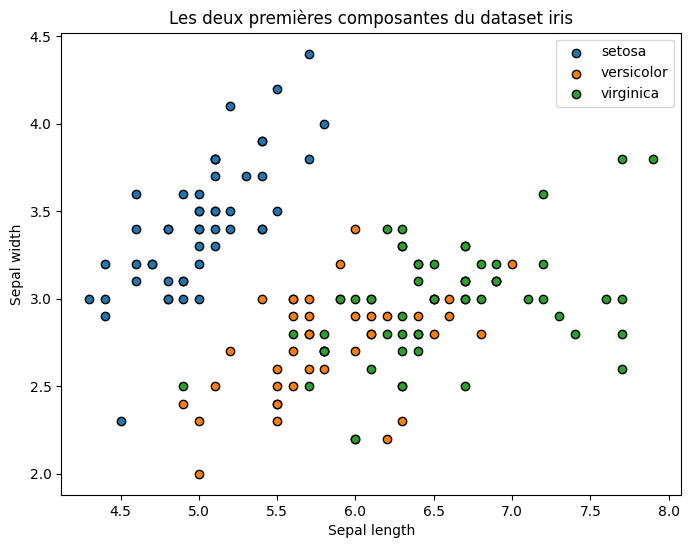

In [4]:
X=iris.data
colors =['r','b','g','c','m','o']
n_colors = 6
y = iris.target
fig = plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[0:50, 0], X[0:50, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[0])
plt.scatter(X[50:100, 0], X[50:100, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[1])
plt.scatter(X[100:150, 0], X[100:150, 1], cmap=plt.cm.Set1,edgecolor='k',label=iris.target_names[2])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Les deux premières composantes du dataset iris')
plt.legend(scatterpoints=1)
plt.savefig('affich_iris')
plt.show()

In [5]:
h=myACP(iris.data)[1]
h

array([4.20005343, 0.24105294, 0.0776881 , 0.02367619])

In [6]:
s=h/(sum(h))*100
s

array([92.46187232,  5.30664831,  1.71026098,  0.52121839])

In [7]:
import seaborn as sns

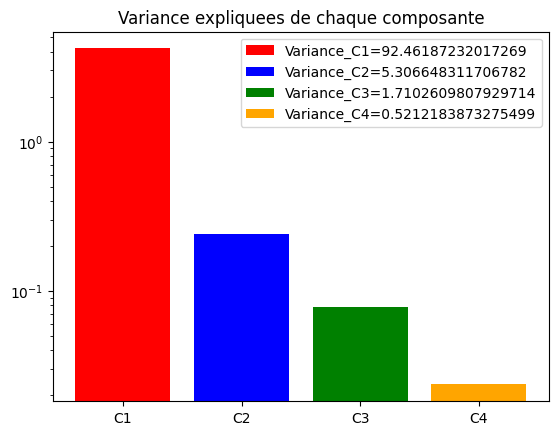

In [8]:
bar_labels = [f'Variance_C1={s[0]}',f'Variance_C2={s[1]}',f'Variance_C3={s[2]}',f'Variance_C4={s[3]}']
bar_colors = ['red', 'blue', 'green', 'orange']
plt.bar(['C1','C2','C3','C4'],h,label=bar_labels, color=bar_colors)
plt.legend()
plt.yscale('log')
plt.title('Variance expliquees de chaque composante')
plt.savefig('variance')
plt.show()